#### Customer Hypothesis Analysis

In [ ]:
#Problem Statement

# Food-delivery App want to increase customer satisfaction and sales.

# Do delivery delays affect customer satisfaction?
# Do higher prices lead to lower ratings?
# Do repeat customers give better reviews?

In [ ]:
# Hypothesis 1

# H₀ (Null): Delivery time has no effect on customer review score
# H₁ (Alternative): Longer delivery time reduces customer review score

# Hypothesis 2

# H₀: Order price does not affect review score
# H₁: Higher order price affects review score

# Hypothesis 3

# H₀: Repeat customers and new customers give similar ratings
# H₁: Repeat customers give higher ratings

##### Step 1: Import Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, pearsonr


##### Step 2: Load Dataset

In [4]:
orders = pd.read_csv("orders.csv")
reviews = pd.read_csv("order_reviews.csv")
payments = pd.read_csv("order_payments.csv")
customers = pd.read_csv("customers.csv")


##### Step 3: Data Understanding

In [14]:
print(orders.shape)
print(reviews.shape)
print(payments.shape)
print(customers.shape)

orders.head()
reviews.head()
payments.head()

# Check missing values
orders.isnull().sum()


(99441, 9)
(99224, 7)
(103886, 5)
(99441, 5)


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
delivery_days                    2965
dtype: int64

##### Step 4: Data Preprocessing

In [ ]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

# Calculate delivery time - Create Delivery Time Column

orders['delivery_days'] = (
    orders['order_delivered_customer_date'] - 
    orders['order_purchase_timestamp']
).dt.days



##### Step 5: Merge Required Tables

In [ ]:
df = orders.merge(reviews, on='order_id', how='inner')
df = df.merge(payments, on='order_id', how='inner')
df = df.merge(customers, on='customer_id', how='inner')

df = df[['delivery_days',
         'review_score',
         'payment_value',
         'customer_unique_id']]

df = df.dropna()

# Now all columns have same number of rows


##### Hypothesis Testing

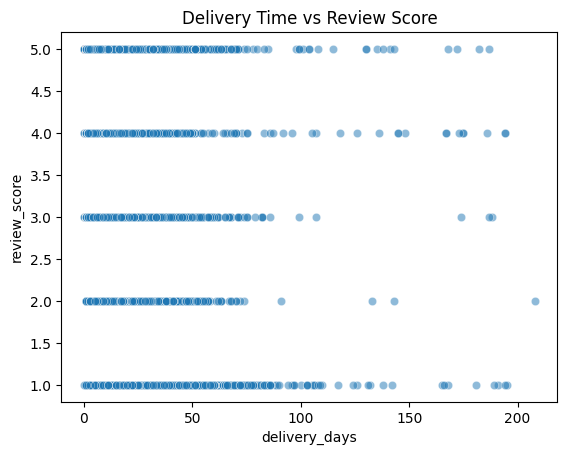

Correlation: -0.3321845090423393
P-value: 0.0
Reject H0: Delivery time significantly affects review score


In [21]:

# Hypothesis 1: Delivery Time vs Review Score
sns.scatterplot(
    x='delivery_days',
    y='review_score',
    data=df,
    alpha=0.5
)
plt.title("Delivery Time vs Review Score")
plt.show()


# Correlation Test
corr, p_value = pearsonr(
    df['delivery_days'],
    df['review_score']
)

print("Correlation:", corr)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject H0: Delivery time significantly affects review score")
else:
    print("Fail to reject H0: Delivery time does not significantly affect review score")
    

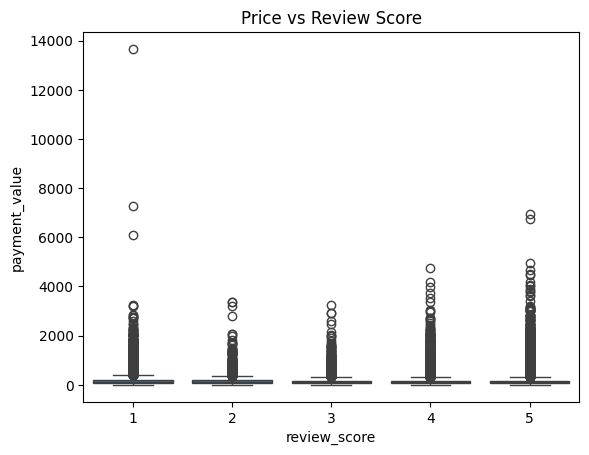

Correlation: -0.040162375202689685
P-value: 3.2621662217083587e-37
Reject H0: Price significantly affects review score


In [22]:
# Hypothesis 2: Order Price vs Review Score
sns.boxplot(
    x='review_score',
    y='payment_value',
    data=df
)
plt.title("Price vs Review Score")
plt.show()

# Correlation Test
price_corr, price_p = pearsonr(
    df['payment_value'],
    df['review_score']
)

print("Correlation:", price_corr)
print("P-value:", price_p)
if price_p < 0.05:
    print("Reject H0: Price significantly affects review score")
else:
    print("Fail to reject H0: Price does not significantly affect review score")

In [24]:
# Hypothesis 3: Repeat Customers vs New Customers

# Identify Repeat Customers
# Create order count per customer
order_count = (
    df.groupby('customer_unique_id')
      .size()
      .reset_index(name='order_count')
)
# Merge safely
df = df.merge(order_count, on='customer_unique_id', how='left')

print(df.columns)

# Split Groups
repeat_customers = df[df['order_count'] > 1]['review_score']
new_customers = df[df['order_count'] == 1]['review_score']

# Drop NaNs
repeat_customers = repeat_customers.dropna()
new_customers = new_customers.dropna()

# T-Test
t_stat, p_val = ttest_ind(
    repeat_customers,
    new_customers,
    equal_var=False
)

print("T-statistic:", t_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("Reject H0: Repeat customers give significantly different ratings than new customers")
else:
    print("Fail to reject H0: No significant difference in ratings between repeat and new customers")




Index(['delivery_days', 'review_score', 'payment_value', 'customer_unique_id',
       'order_count_x', 'order_count_y', 'order_count'],
      dtype='object')
T-statistic: 0.56945073541411
P-value: 0.5690575099955077
Fail to reject H0: No significant difference in ratings between repeat and new customers
